In [1]:
from ptiming_ana import *
from lstchain.io.io import dl2_params_lstcam_key,dl2_params_src_dep_lstcam_key
from astropy.io import fits
import pandas as pd
import matplotlib.pylab as plt
from IPython.display import Image
import numpy as np

# Creating the PulsarAnalysis object and settings

In [2]:
h=PulsarAnalysis()

In [3]:
h.setBackgroundLimits([0.52,0.87])
h.setPeaklimits(P1_limits=[0,0.026,0.983,1],P2_limits=[0.377,0.422],P3_limits=None)

In [4]:
h.setBinning(50,xmin=0,xmax=1)

In [5]:
h.setTimeInterval(tint=3600*24)

In [6]:
h.setFittingParams(model='lorentzian',binned=False)

In [7]:
h.setEnergybinning(np.logspace(np.log10(0.1),np.log10(10), 4))

# Extracting phases, times and energies from file and give them to the object

#### For Fermi data there is a class to read these lists and use them in the main object.

In [8]:
h.setFermiInputFile('./example_data/merged2_pulsar.fits')

#### But in general we can read our file (FITS, DL2, DL3...) and extract phases, times and energies as lists and read them as follows:

In [9]:
f=fits.open('./example_data/merged2_pulsar.fits')
fits_table=f[1].data

In [10]:
times=np.sort(fits_table['BARYCENTRIC_TIME'].byteswap().newbyteorder())
phases=fits_table['PULSE_PHASE'].byteswap().newbyteorder()
energies=fits_table['ENERGY'].byteswap().newbyteorder()

In [11]:
h.setListsInput(phases[0:1000],times[0:1000],energies[0:1000]/1000,tel='fermi',energy_units='TeV')

# Run the code

In [9]:
h.run()

Initializing...
Calculating statistics...
Fitting the data to the set model...
[0.00024178779258205937, 0.00023886992065254474, 0.0007086501097629995, 0.0006967975507728148, 0.012990405453492513, 0.015291803731799796, 0.01382764261386226]

Performing energy-dependent analysis...
Creating object in energy range (GeV):0.10-0.46
Calculating statistics...
Fitting the data to the set model...
[0.0003383566009328841, 0.000328881901427259, 0.0010889546303203355, 0.0009819386967797488, 0.014871591369408521, 0.01216879818296746, 0.010446844022033483]
Creating object in energy range (GeV):0.46-2.15
Calculating statistics...
Fitting the data to the set model...
[0.00038019091887631816, 0.00039073790651361905, 0.0012349031423245858, 0.0011105086744545279, 1.1123693129931969, 0.5084491306315932, 0.35955128570108164]
Creating object in energy range (GeV):2.15-10.00
Calculating statistics...
Fitting the data to the set model...
[0.0007790322249462431, 0.0008455513338479018, 0.0032261084063262713, 0.0

# Show the results

## Overall results

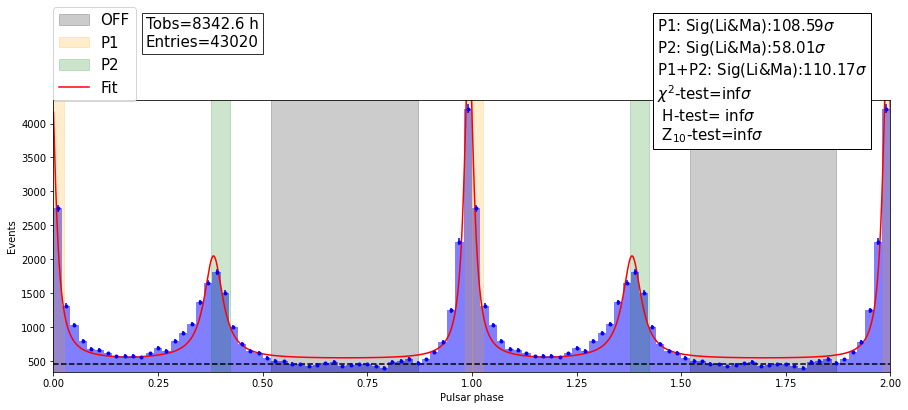

In [10]:
phaseogram=h.draw_phaseogram(phase_limits=[0,2],colorhist='blue',fit=True)

In [11]:
results=h.show_Presults()

RESULTS FOR THE PEAK STATISTICS:

                       P1           P2         P1+P2
Significance   108.591359    58.006568    110.165719
Nex           5959.237143  2677.271429   8636.508571
Nex_error       84.220286    62.208240    105.936656
Number        6969.000000  3734.000000  10703.000000
noff          1009.762857  1056.728571   2066.491429
sign_t_ratio     1.160281     0.619791      1.177103
s/n ratio      187.534413    82.358927    189.985915

P1/P2 ratio=2.23+/-0.06


 
RESULTS FOR THE PERIODICITY SEARCH:

                    Chi_square_test       Zn_test        H_test
Statistic              2.697743e+04  2.599217e+04  2.810141e+04
p-value                0.000000e+00  0.000000e+00  0.000000e+00
Number of $\sigma$              inf           inf           inf


## Result of the fitting

In [12]:
h.fit_model

'lorentzian'

In [13]:
fit_result=h.show_fit_results()

      Name     Value     Error
0     mu_1  0.992820  0.000242
1  gamma_1  0.013799  0.000239
2     mu_2  0.382415  0.000709
3  gamma_2  0.026851  0.000697
4        A  2.138483  0.012990
5        B  0.803291  0.015292
6        C  0.514206  0.013828


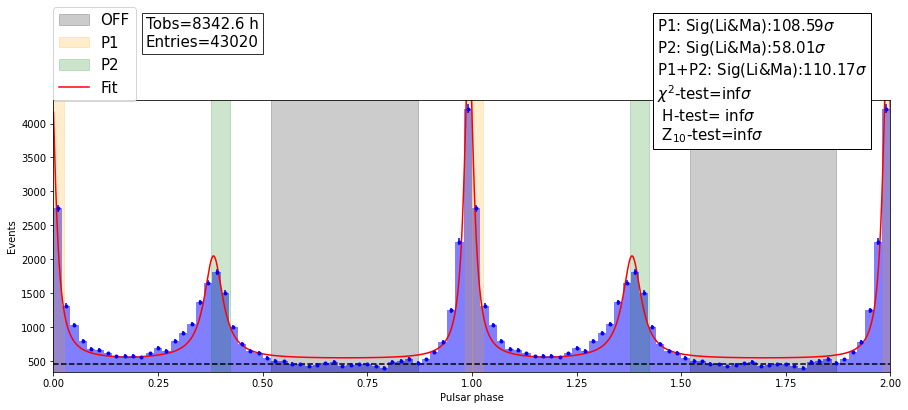

In [14]:
phaseogram=h.draw_phaseogram(phase_limits=[0,2],colorhist='blue',fit=True)

## Results vs Time

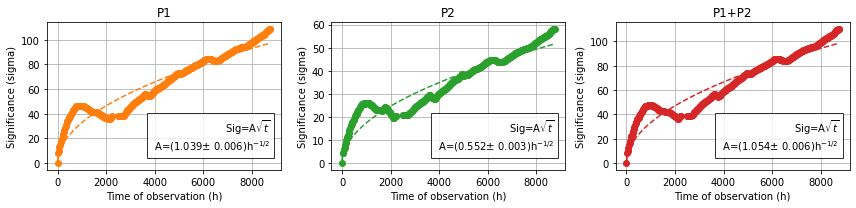

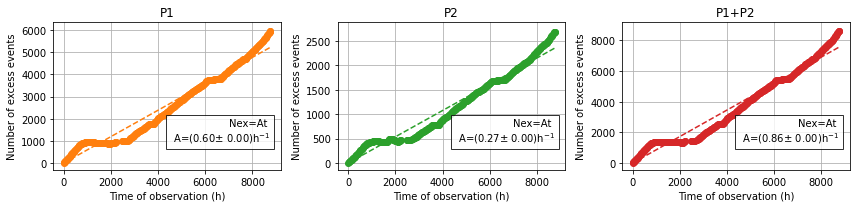

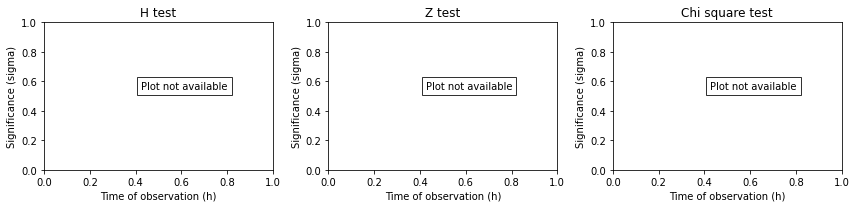

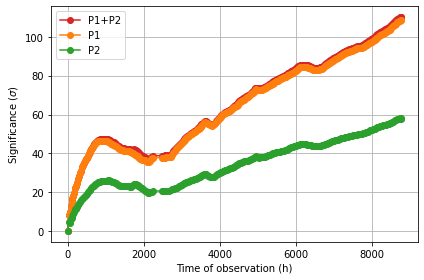

In [15]:
TimeEv=h.show_timeEvolution()

## Results vs Energy

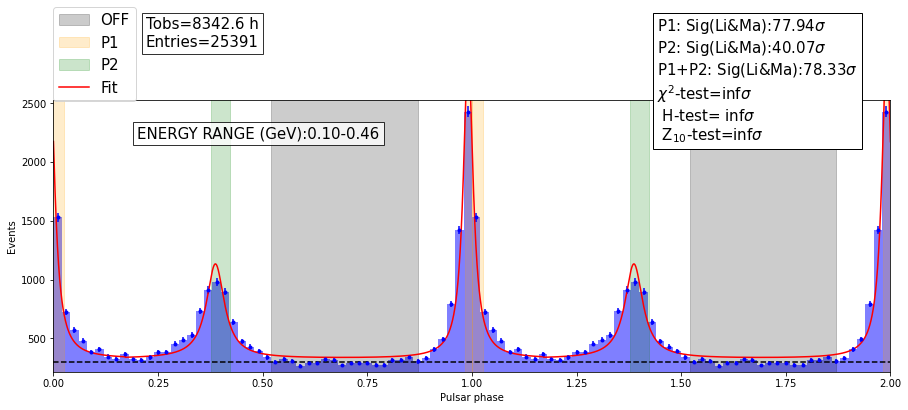

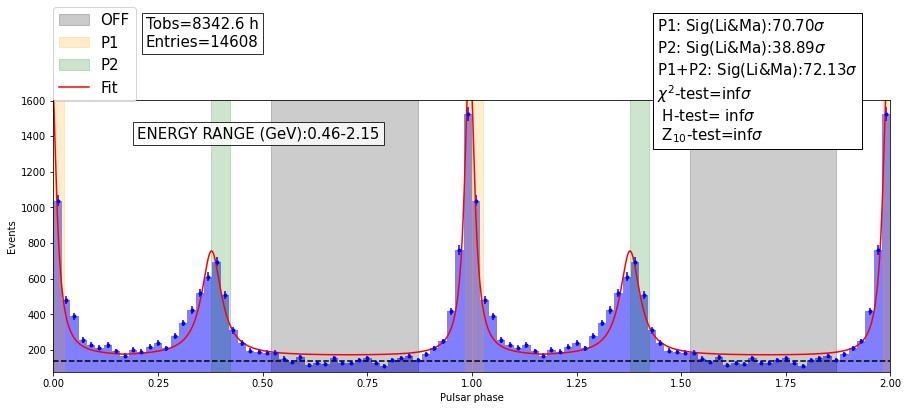

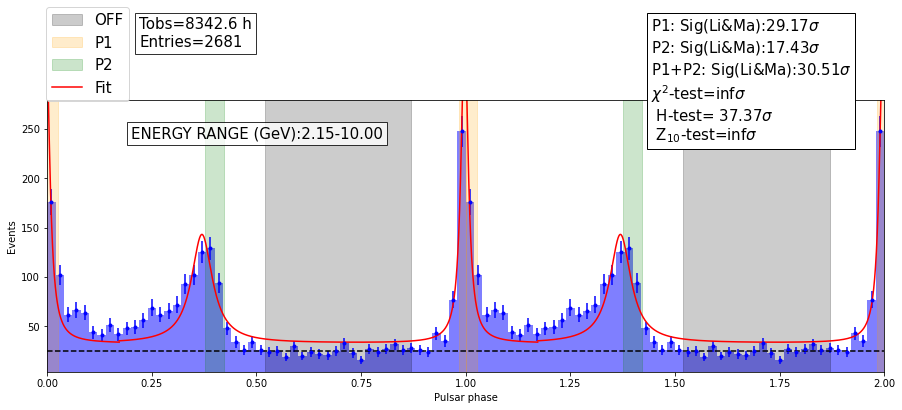

[<Figure size 1080x360 with 1 Axes>,
 <Figure size 1080x360 with 1 Axes>,
 <Figure size 1080x360 with 1 Axes>]

In [16]:
h.show_lcVsEnergy()

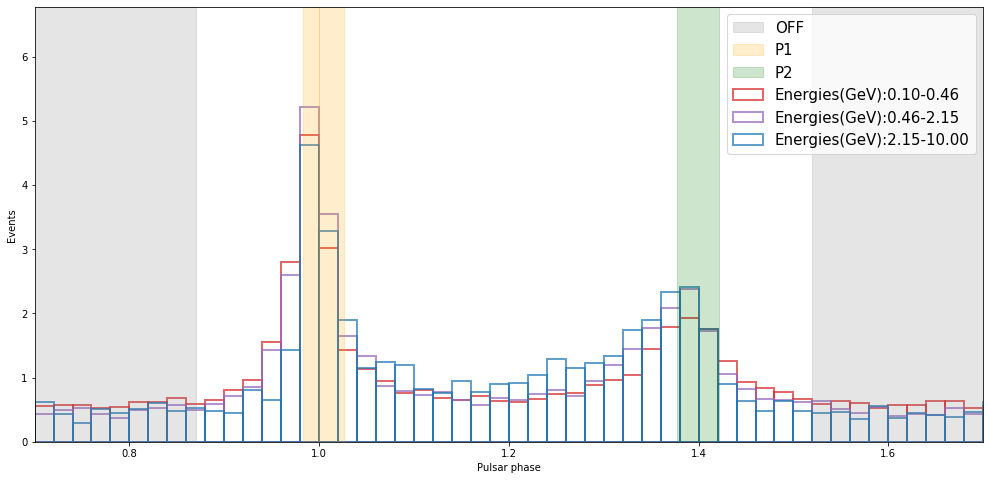

In [17]:
energy_lc=h.show_all_lc(ylimits=None)

In [18]:
energy_results=h.show_EnergyPresults()

ENERGY RANGE (GeV):0.10-0.46

RESULTS FOR THE PEAK STATISTICS:

                       P1           P2        P1+P2
Significance    77.938926    40.065634    78.325332
Nex           3282.842857  1426.928571  4709.771429
Nex_error       63.285199    46.760429    79.730405
Number        3926.000000  2100.000000  6026.000000
noff           643.157143   673.071429  1316.228571
sign_t_ratio     0.832768     0.428097     0.836897
s/n ratio      129.446868    55.001136   129.817779

P1/P2 ratio=2.30+/-0.09


 
RESULTS FOR THE PERIODICITY SEARCH:

                    Chi_square_test       Zn_test        H_test
Statistic              1.466663e+04  1.419915e+04  1.517779e+04
p-value                0.000000e+00  0.000000e+00  0.000000e+00
Number of $\sigma$              inf           inf           inf

 

-------------------------------------------------------------------
ENERGY RANGE (GeV):0.46-2.15

RESULTS FOR THE PEAK STATISTICS:

                       P1           P2        P1+P2
Significan

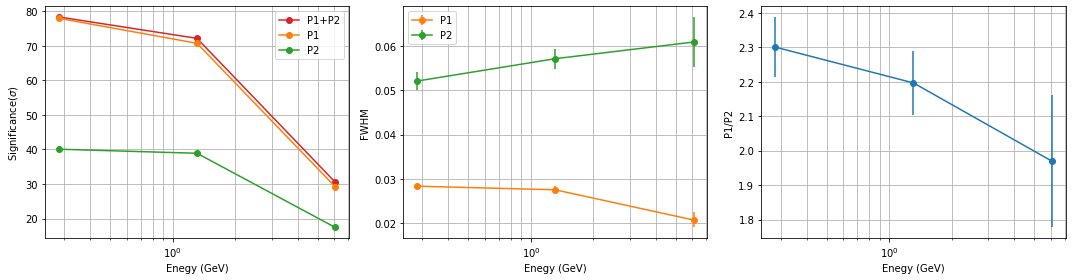

In [19]:
energy_plots=h.show_EnergyAna()

## Fit vs Energy

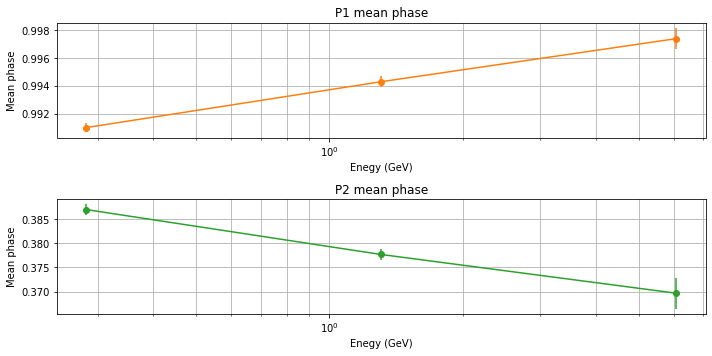

In [20]:
mean_energy_plot=h.show_meanVsEnergy()

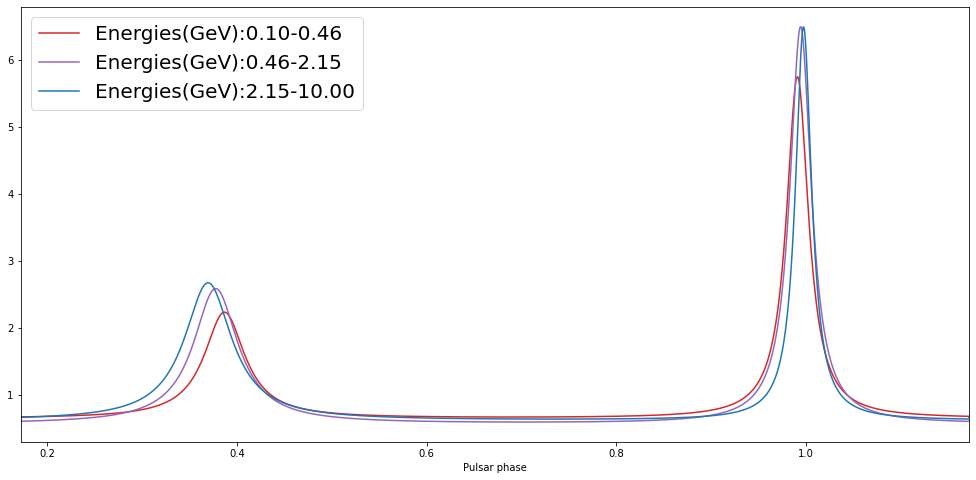

In [21]:
allfits_plot=h.show_all_fits()